In [1]:
from resources import *

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Step 1: Peak Alignment and Interpolation. 

In [2]:
df1007 = "/Users/darenma/Downloads/MetCorr_AIF_MS_PD/MetCorr_AIF_PD/1007_DPA_MetCorrWB_model.crv"
df1007 = pd.read_csv(df1007, sep="\t")

In [3]:
df1007

,Parent_input_curve_model_time[seconds],value[kBq/cc]
0,0,0.000166
1,15,0.000401
2,30,0.000237
3,45,0.000457
4,60,-0.000195
5,75,0.000681
6,90,22.486587
7,105,42.942086
8,120,31.378096
9,135,24.305034


In [12]:
PATH_PD = "/Users/darenma/Downloads/MetCorr_AIF_MS_PD/MetCorr_AIF_PD/"
PATH_MS = "/Users/darenma/Downloads/MetCorr_AIF_MS_PD/MetCorr_AIF_MS/"
PATH_RETEST = "/Users/darenma/Downloads/ReTest/"


pd_subjs = ['1001', '1002',  '1003', '1004', '1005', '1007', '1009',
            '1013', '1015', '1020', '1022', '1023']
ms_subjs = ["DPA050819", "DPA052219", "DPA092617", "DPA110117", "DPA121918"]
retest_subjs = ["050819", "052219", "092617", "110117", "121918"]
ms_dict = {"DPA050819": "PP", "DPA052219": "MM", "DPA092617": "FR", "DPA110117": "KT", "DPA121918": "JD",
           "050819": "PP-r", "052219": "MM-r", "092617": "FR-r", "110117": "KT-r", "121918": "JD-r"}

# 15 second interpolation
tts = pd.DataFrame({"tts": np.array(range(0, 5415, 15))}).astype(int)

In [13]:
totl_df = tts.copy()
for name in pd_subjs:
    print(name)
    df_temp = pd.read_csv(PATH_PD+f"{name}_DPA_MetCorrWB_model.crv", sep="\t")
    df_temp.columns = ['time', name]
    df_temp.time.astype(int)
    df_temp[name].astype(np.float64)
    cut_index = df_temp.loc[df_temp.time == df_temp.time.max()].index[0]
    df_temp = df_temp.iloc[:cut_index+1].copy()
    if name == "1002":
        df_temp = df_temp.drop(index=[40, 41]).copy()
    totl_df = pd.merge(totl_df, df_temp, left_on="tts", right_on="time", how="left", validate="one_to_one")
    
for name in ms_subjs:
    print(name)
    df_temp = pd.read_csv(PATH_MS+f"{name}_MetCorr_Blood.crv", sep="\t")
    df_temp.columns = ['time', ms_dict[name]]
    df_temp.time.astype(int)
    df_temp[ms_dict[name]].astype(np.float64)
    cut_index = df_temp.loc[df_temp.time == df_temp.time.max()].index[0]
    df_temp = df_temp.iloc[:cut_index+1].copy()
    totl_df = pd.merge(totl_df, df_temp, left_on="tts", right_on="time", how="left", validate="one_to_one")
    
for name in retest_subjs:
    print(name)
    df_temp = pd.read_csv(PATH_RETEST+f"DPA{name}_MetCorr_Blood.crv", sep="\t")
    df_temp.columns = ['time', ms_dict[name]]
    df_temp.time.astype(int)
    df_temp[ms_dict[name]].astype(np.float64)
    cut_index = df_temp.loc[df_temp.time == df_temp.time.max()].index[0]
    df_temp = df_temp.iloc[:cut_index+1].copy()
    totl_df = pd.merge(totl_df, df_temp, left_on="tts", right_on="time", how="left", validate="one_to_one")

1001
1002
1003
1004
1005
1007
1009
1013
1015
1020
1022
1023
DPA050819
DPA052219
DPA092617
DPA110117
DPA121918
050819
052219
092617
110117
121918


/Users/darenma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'time_x'} in the result is deprecated and will raise a MergeError in a future version.
  if sys.path[0] == '':
/Users/darenma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'time_x'} in the result is deprecated and will raise a MergeError in a future version.
/Users/darenma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Passing 'suffixes' which cause duplicate columns {'time_x'} in the result is deprecated and will raise a MergeError in a future version.


In [14]:
totl_df

,tts,time_x,1001,time_y,1002,time_x,1003,time_y,1004,time_x,...,time_y,PP-r,time_x,MM-r,time_y,FR-r,time_x,KT-r,time_y,JD-r
0,0,0.0,0.000000,0.0,0.000000,0.0,-4.513745e-04,NaN,NaN,0.0,...,0.0,0.000000,0.0,0.000000,0.0,2.875487,0.0,0.000000,0.0,0.000000
1,15,15.0,0.000000,15.0,0.000000,15.0,6.486634e-04,NaN,NaN,15.0,...,15.0,0.000000,15.0,0.000000,15.0,15.268822,15.0,0.019977,15.0,0.849442
2,30,30.0,31.171421,30.0,0.000000,30.0,6.811858e-04,NaN,NaN,30.0,...,30.0,0.019990,30.0,1.219983,30.0,29.042690,30.0,4.877288,30.0,19.287583
3,45,45.0,59.208352,45.0,34.368359,45.0,2.700293e-01,45.0,22.139838,45.0,...,45.0,10.748789,45.0,22.739043,45.0,38.332426,45.0,17.505821,45.0,43.543287
4,60,60.0,48.390493,60.0,48.984209,60.0,9.247292e+00,60.0,31.461949,60.0,...,60.0,26.670829,60.0,35.313365,60.0,40.211147,60.0,26.302699,60.0,47.915434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,5355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,5370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,5385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tnew=pd.read_csv("Interpolate_0724_slinear.csv",index_col=0)

In [18]:
subjs_totl = []
for ci in range(2, 45, 2):
    cj = ci+1
    subjs_totl.append(totl_df.columns[ci])
print(subjs_totl)

peaks = []
for name in subjs_totl:
    peaks.append(np.argmax(totl_df[name]))
    
places_to_shift = []
for name in subjs_totl:
    places_to_shift.append(np.argmax(totl_df[name])-4)
print(places_to_shift)

['1001', '1002', '1003', '1004', '1005', '1007', '1009', '1013', '1015', '1020', '1022', '1023', 'PP', 'MM', 'FR', 'KT', 'JD', 'PP-r', 'MM-r', 'FR-r', 'KT-r', 'JD-r']
[-1, 0, 2, 1, 0, 3, 0, -1, -1, 4, -1, 0, 0, -2, -4, 2, -1, 0, 0, 0, 1, 0]


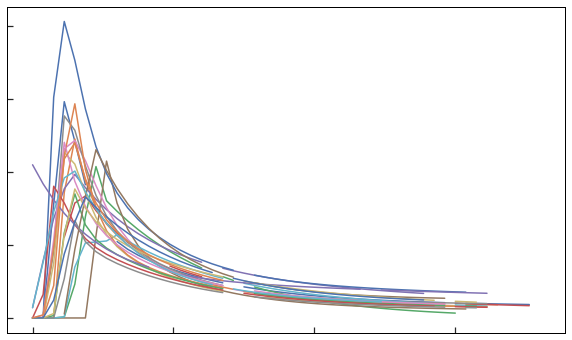

In [19]:
plt.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "xtick.labelsize": 28,
    "ytick.labelsize": 28,
    "figure.facecolor": 'white',  # Background color to white
    "axes.facecolor": 'white',    # Background color to white
    "axes.edgecolor": 'black',    # Border color
    "axes.linewidth": 1.0         # Border width
})

plt.rcParams["figure.figsize"] = (10, 6)

for name in subjs_totl:
    plt.plot(tnew.iloc[:50]["tts"], totl_df.iloc[:50][name])

plt.tick_params(axis='both', which='both', direction='in', bottom=True,
                top=False, left=True, right=False, labelbottom=False, labelleft=False)
plt.savefig('2A.eps', bbox_inches='tight', pad_inches=0, dpi=600)

In [20]:
len(totl_df.columns)

45

In [21]:
df = totl_df.drop(columns=["tts"]).copy()
print(df.columns)

num_list = list(range(0, 44))
assert len(df.columns) == len(num_list)
for i in range(0, 22):
    num_list[2*i] = f"Unnamed: {int(2*i)}"
    num_list[2*i+1] = df.columns[2*i+1]
df.columns = num_list

df.loc[df.shape[0]+1]= None
for i, j in enumerate(places_to_shift):
    time_delta = 15 * j
    ts_name = f"Unnamed: {int(2*i)}"
    sj_name = subjs_totl[i]
    print(ts_name)
    df.loc[:, ts_name] = df[ts_name] - time_delta
    minimum = df.loc[:, ts_name].min()
    maximum = df.loc[:, ts_name].max()
    print(minimum, maximum)
    if minimum > 0:
#         print(df.loc[df[ts_name]==minimum, sj_name])
#         if df.loc[df[ts_name]==minimum, sj_name].values > 0:
        df.loc[:, ts_name].iloc[-1] = 0
        df.loc[:, sj_name].iloc[-1] = 0
    
    df.loc[df[ts_name]==maximum, ts_name] = 5400.0
    df.loc[(df[ts_name]==5400)&df[sj_name].isna(), sj_name] = 0
    minimum = df.loc[:, ts_name].min()
    maximum = df.loc[:, ts_name].max()
    print(minimum, maximum)

Index(['time_x', '1001', 'time_y', '1002', 'time_x', '1003', 'time_y', '1004',
       'time_x', '1005', 'time_y', '1007', 'time_x', '1009', 'time_y', '1013',
       'time_x', '1015', 'time_y', '1020', 'time_x', '1022', 'time_y', '1023',
       'time_x', 'PP', 'time_y', 'MM', 'time_x', 'FR', 'time_y', 'KT',
       'time_x', 'JD', 'time_y', 'PP-r', 'time_x', 'MM-r', 'time_y', 'FR-r',
       'time_x', 'KT-r', 'time_y', 'JD-r'],
      dtype='object')
Unnamed: 0
15.0 5415.0
0.0 5400.0
Unnamed: 2
0.0 5400.0
0.0 5400.0
Unnamed: 4
-30.0 5370.0
-30.0 5400.0
Unnamed: 6
30.0 5385.0
0.0 5400.0
Unnamed: 8
0.0 5400.0
0.0 5400.0
Unnamed: 10
-45.0 5355.0
-45.0 5400.0
Unnamed: 12
0.0 5400.0
0.0 5400.0
Unnamed: 14
15.0 5415.0
0.0 5400.0
Unnamed: 16
15.0 5415.0
0.0 5400.0
Unnamed: 18
-60.0 5340.0
-60.0 5400.0
Unnamed: 20
15.0 5415.0
0.0 5400.0
Unnamed: 22
0.0 5400.0
0.0 5400.0
Unnamed: 24
0.0 5400.0
0.0 5400.0
Unnamed: 26
30.0 5430.0
0.0 5400.0
Unnamed: 28
60.0 5460.0
0.0 5400.0
Unnamed: 30
15.0 5370.0
0

In [22]:
for i, name in enumerate(subjs_totl):
    lfs = "Unnamed: "+str(2*i)
    print(lfs)
    print(name)
    df_mid = df[[lfs, name]].copy().dropna().astype(float)
    df_mid = df_mid.loc[df_mid[lfs]>=0, :]
    assert len(df_mid.columns) == 2
    tts = pd.merge(tts, df_mid, how="left", left_on="tts", right_on=lfs, validate="one_to_one")

Unnamed: 0
1001
Unnamed: 2
1002
Unnamed: 4
1003
Unnamed: 6
1004
Unnamed: 8
1005
Unnamed: 10
1007
Unnamed: 12
1009
Unnamed: 14
1013
Unnamed: 16
1015
Unnamed: 18
1020
Unnamed: 20
1022
Unnamed: 22
1023
Unnamed: 24
PP
Unnamed: 26
MM
Unnamed: 28
FR
Unnamed: 30
KT
Unnamed: 32
JD
Unnamed: 34
PP-r
Unnamed: 36
MM-r
Unnamed: 38
FR-r
Unnamed: 40
KT-r
Unnamed: 42
JD-r


In [23]:
tts["1007"]

0       0.000457
1      -0.000195
2       0.000681
3      22.486587
4      42.942086
         ...    
356          NaN
357          NaN
358          NaN
359          NaN
360     0.417784
Name: 1007, Length: 361, dtype: float64

In [24]:
subjs = subjs_totl
test_q = tts[["tts"]+subjs].interpolate(method="quadratic")
test_akima = tts[["tts"]+subjs].interpolate(method="akima")
test_linear = tts[["tts"]+subjs].interpolate(method="slinear")
test_spline = tts[["tts"]+subjs].interpolate(method="spline", order=5)

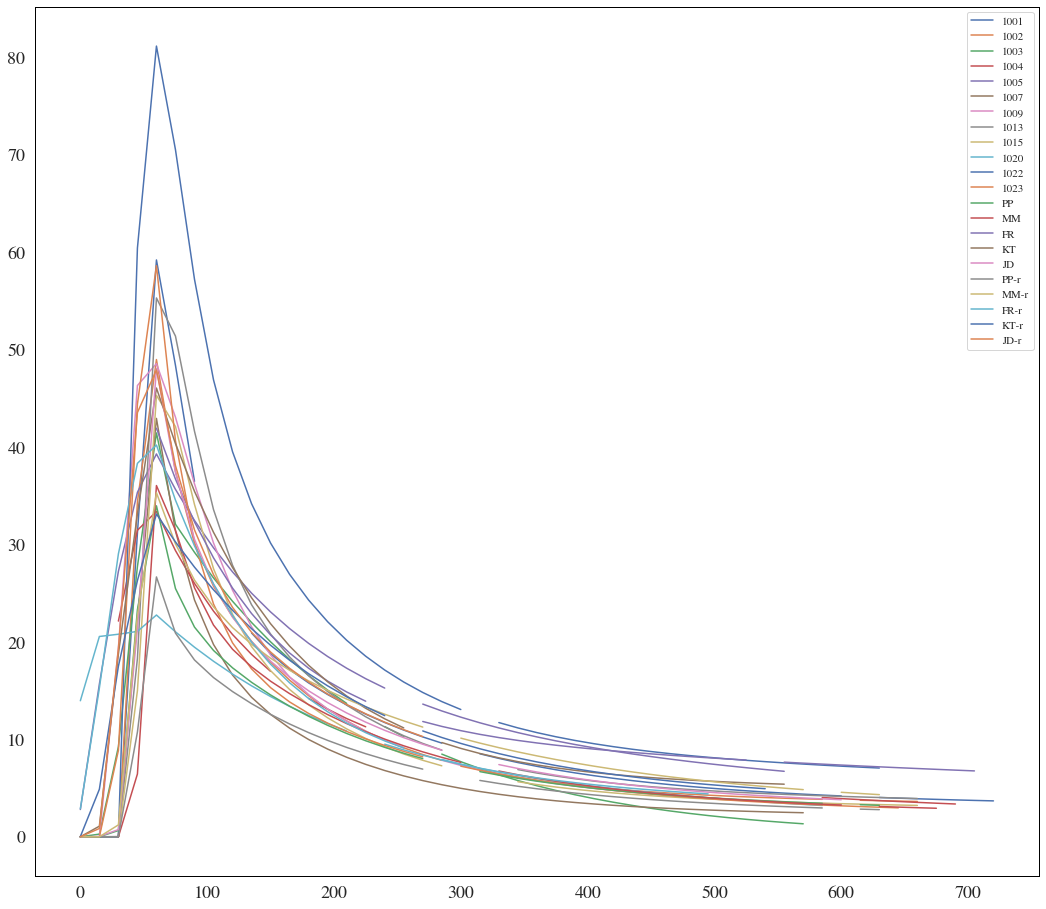

In [25]:
plt.rcParams["figure.figsize"] = (18, 16)
short_tts = tts.iloc[:50]
for name in subjs:
    plt.plot(short_tts["tts"], short_tts[name], )
    plt.xlim=[0, 800]
plt.legend(subjs)
# plt.title("Raw TAC Curves", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
# plt.savefig("RawTAC_Lines.png", dpi=600)

In [26]:
test_linear

,tts,1001,1002,1003,1004,1005,1007,1009,1013,1015,...,PP,MM,FR,KT,JD,PP-r,MM-r,FR-r,KT-r,JD-r
0,0,0.000000,0.000000,6.811858e-04,0.000000,2.796953,0.000457,0.000000,0.000000,0.000000,...,0.000557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.875487,0.019977,0.000000
1,15,0.000000,0.000000,2.700293e-01,11.069919,15.677850,-0.000195,0.000000,0.000000,0.000000,...,0.000352,0.000000,10.483606,1.086649,0.036519,0.000000,0.000000,15.268822,4.877288,0.849442
2,30,0.000000,0.000000,9.247292e+00,22.139838,27.244724,0.000681,19.396233,0.000000,0.000000,...,0.641315,0.000000,20.967212,18.767985,0.735647,0.019990,1.219983,29.042690,17.505821,19.287583
3,45,31.171421,34.368359,2.774306e+01,31.461949,35.356571,22.486587,46.319695,18.296082,14.990983,...,23.304393,6.443136,31.450817,33.130612,21.341486,10.748789,22.739043,38.332426,26.302699,43.543287
4,60,59.208352,48.984209,4.145142e+01,33.394315,39.295153,42.942086,48.572047,55.306028,45.315262,...,33.970964,36.050840,41.934423,46.059489,48.083775,26.670829,35.313365,40.211147,33.128422,47.915434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340,0.982700,0.485814,4.027397e-08,0.436141,0.679269,0.430912,0.424261,0.635392,0.520611,...,0.302424,0.303025,1.004503,1.972078,0.402701,0.215772,0.549020,0.990639,1.748343,0.523217
357,5355,0.978329,0.480183,3.020550e-08,0.432706,0.676183,0.427630,0.421490,0.630598,0.516684,...,0.299997,0.300557,0.997856,1.965768,0.399494,0.213612,0.545748,0.987714,1.745459,0.519455
358,5370,0.973957,0.474552,2.013704e-08,0.429271,0.673097,0.424348,0.418719,0.625804,0.512756,...,0.297571,0.298088,0.991209,1.959457,0.396286,0.211451,0.542476,0.984789,1.742574,0.515692
359,5385,0.969585,0.468921,1.006858e-08,0.425836,0.670011,0.421066,0.415949,0.621011,0.508828,...,0.295144,0.295620,0.984562,1.953147,0.393079,0.209291,0.539204,0.981864,1.739689,0.511930


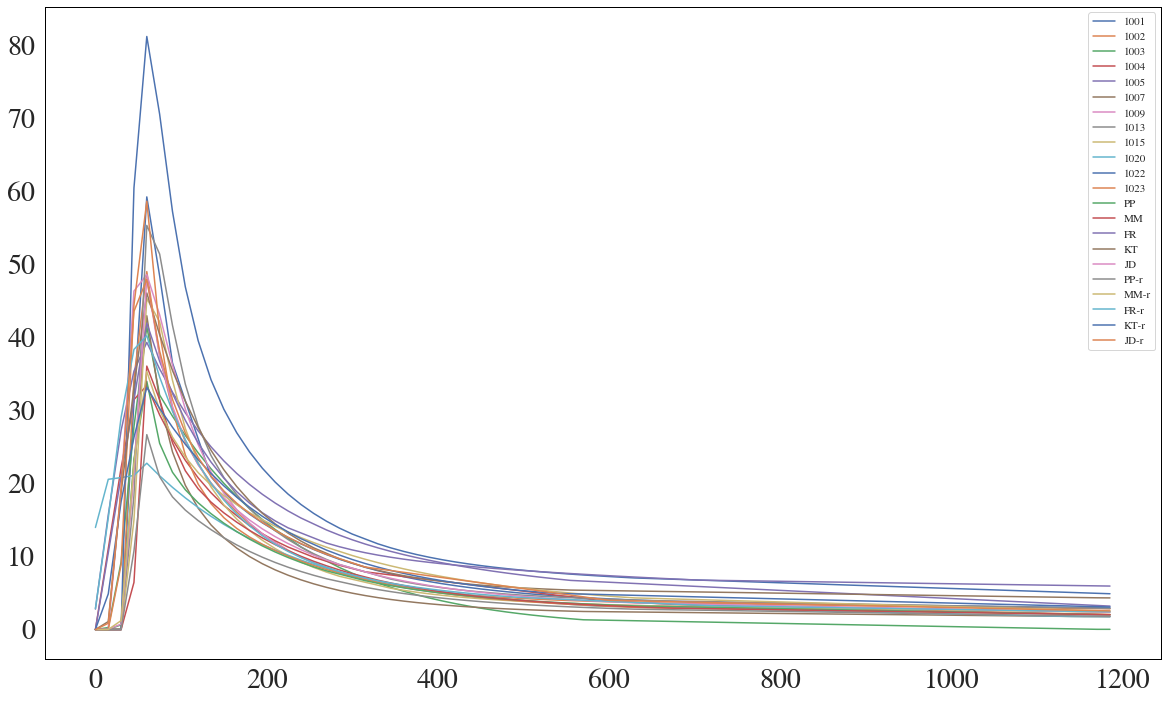

In [27]:
plt.rcParams["figure.figsize"] = (20,12)
for name in subjs:
    
    plt.plot(test_linear.iloc[:80]["tts"], test_linear.iloc[:80][name])
plt.legend(subjs)
# plt.savefig("Interpolate_0915.png")
plt.show()

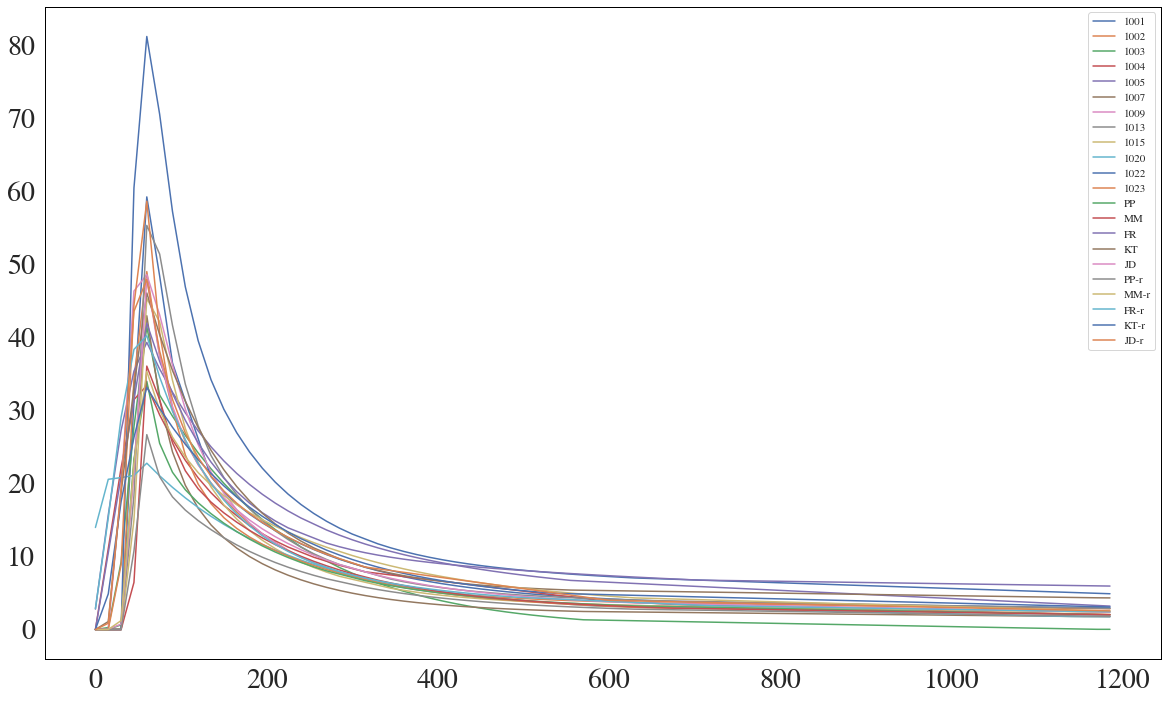

In [28]:
tnew = tests = tts[["tts"]+subjs].interpolate(method="linear")

plt.rcParams["figure.figsize"] = (20,12)
for name in subjs:
    
    plt.plot(tnew.iloc[:80]["tts"], tnew.iloc[:80][name])
plt.legend(subjs)
plt.show()

In [29]:
tnew

,tts,1001,1002,1003,1004,1005,1007,1009,1013,1015,...,PP,MM,FR,KT,JD,PP-r,MM-r,FR-r,KT-r,JD-r
0,0,0.000000,0.000000,6.811858e-04,0.000000,2.796953,0.000457,0.000000,0.000000,0.000000,...,0.000557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.875487,0.019977,0.000000
1,15,0.000000,0.000000,2.700293e-01,11.069919,15.677850,-0.000195,0.000000,0.000000,0.000000,...,0.000352,0.000000,10.483606,1.086649,0.036519,0.000000,0.000000,15.268822,4.877288,0.849442
2,30,0.000000,0.000000,9.247292e+00,22.139838,27.244724,0.000681,19.396233,0.000000,0.000000,...,0.641315,0.000000,20.967212,18.767985,0.735647,0.019990,1.219983,29.042690,17.505821,19.287583
3,45,31.171421,34.368359,2.774306e+01,31.461949,35.356571,22.486587,46.319695,18.296082,14.990983,...,23.304393,6.443136,31.450817,33.130612,21.341486,10.748789,22.739043,38.332426,26.302699,43.543287
4,60,59.208352,48.984209,4.145142e+01,33.394315,39.295153,42.942086,48.572047,55.306028,45.315262,...,33.970964,36.050840,41.934423,46.059489,48.083775,26.670829,35.313365,40.211147,33.128422,47.915434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340,0.982700,0.485814,4.027397e-08,0.436141,0.679269,0.430912,0.424261,0.635392,0.520611,...,0.302424,0.303025,1.004503,1.972078,0.402701,0.215772,0.549020,0.990639,1.748343,0.523217
357,5355,0.978329,0.480183,3.020550e-08,0.432706,0.676183,0.427630,0.421490,0.630598,0.516684,...,0.299997,0.300557,0.997856,1.965768,0.399494,0.213612,0.545748,0.987714,1.745459,0.519455
358,5370,0.973957,0.474552,2.013704e-08,0.429271,0.673097,0.424348,0.418719,0.625804,0.512756,...,0.297571,0.298088,0.991209,1.959457,0.396286,0.211451,0.542476,0.984789,1.742574,0.515692
359,5385,0.969585,0.468921,1.006858e-08,0.425836,0.670011,0.421066,0.415949,0.621011,0.508828,...,0.295144,0.295620,0.984562,1.953147,0.393079,0.209291,0.539204,0.981864,1.739689,0.511930


In [30]:
tnew.to_csv("Interpolate_0724_slinear.csv")

## Step 2: PBIF

(array([-0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

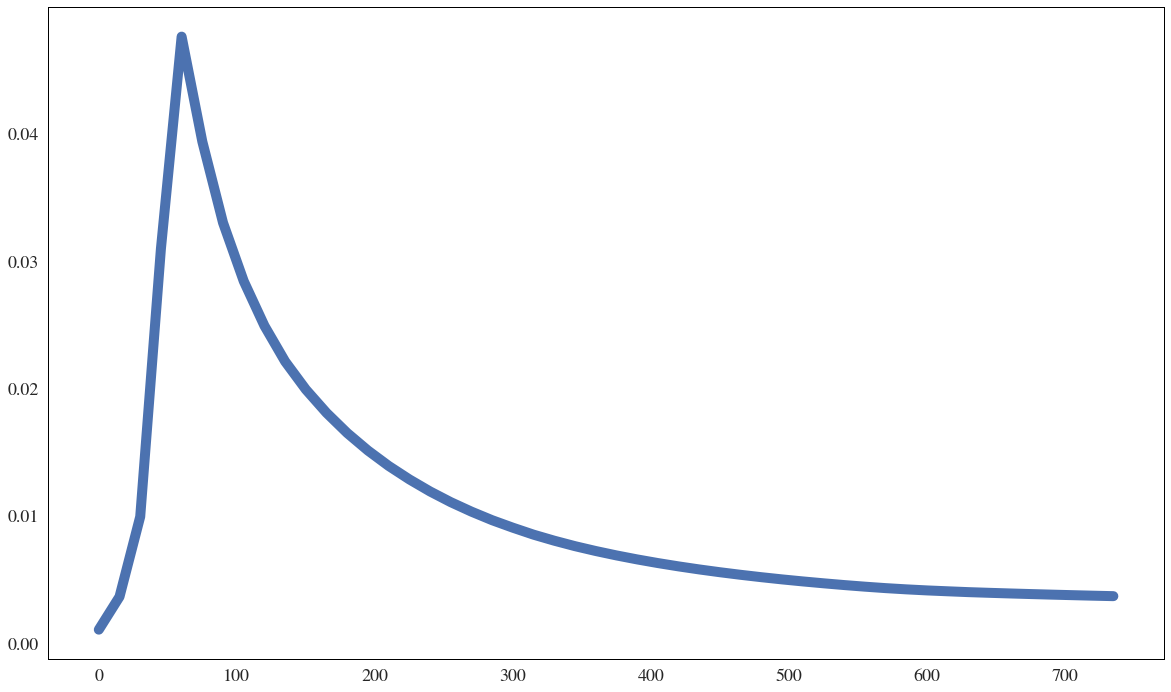

In [31]:
aif = pd.read_csv("Interpolate_0724_slinear.csv", index_col=0)
auc = aif.sum()

auc.loc["tts"] = 1
scaled = aif/auc
pbif = scaled.drop(columns=['tts']).mean(axis=1)
scaled.loc[:, "pbif"] = pbif
plt.plot(scaled.iloc[:50]['tts'], scaled.iloc[:50]['pbif'], linewidth=10, markersize=12)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
# plt.show()
# plt.savefig("PBIF-0519.png", dpi=600)

In [32]:
# Used the Updated Doses Sneha found.
updated = pd.read_csv("/Users/darenma/Downloads/UpdatedDemographics.csv")
aif_new = updated[['ATLaS_ID', 'Age', 'Sex', 'NET dose (mCi)', 'Weight (Kgs)', "Genotype"]].iloc[:17].copy()

## Step 3: Predict the subjects' AUCs

In [33]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [34]:
updated = pd.read_csv("/Users/darenma/Downloads/UpdatedDemographics.csv")

In [35]:
columns_of_interest = ['ATLaS_ID', 'Age', 'Sex', 'NET dose (mCi)', 'Weight (Kgs)', "Height (Feet, inches)", "Genotype"]
demo_1 = updated[columns_of_interest].iloc[:17].copy()
demo_2 = pd.read_csv("/Users/darenma/Downloads/RetestDemographics.csv")[columns_of_interest].copy()

In [36]:
demog = demo_1.append(demo_2).reset_index()[columns_of_interest]

In [37]:
demog.columns = ['ATLaS_ID', 'Age', 'Sex', 'Dose', 'Weight',
                 'Height', 'Genotype']

demog.loc[:, "feet"] = demog.Height.str.split("'").str[0].astype(int)
demog.loc[:, "inch"] = demog.Height.str.split(
    "'").str[1].replace("", "0").str.split(".").str[0].astype(int)
demog.loc[:, "meters"] = 0.3048*demog.feet + 0.0254*demog.inch

In [38]:
demog = demog.drop(columns=["ATLaS_ID", "Height"]).astype(np.float).copy()
demog.loc[:,"sqrt_dose"] = np.sqrt(demog[["Dose"]])
demog.loc[:,"lambda"] = demog['sqrt_dose'].div(demog['Weight'])
demog["dose_by_age"] = demog['Dose']/demog['Age']
demog["weight_by_age"] = demog['Weight']/demog["Age"]
demog.Sex = 2*(demog.Sex-0.5)
demog.Genotype = (demog.Genotype-1.5)*2
demog["asg"] = demog.Age * demog.Sex * demog.Genotype

demog["dose_2"] = demog['Dose']**2
demog["weight_2"] = demog['Weight']**2
demog["sqrt_weight"] = demog['Weight']**0.5
demog["lambda_0.5"] = demog['lambda'] ** 0.5
demog["weight_-1"] = demog['Weight']**(-1)
demog["dose_m_weight"] = demog['Weight']*demog['Dose']

demog.loc[:,"ID"] = subjs
# demog.loc[:, "peaks"] = peaks
demog.loc[:, "auc"] = auc[1:].values

In [39]:
demog.columns

Index(['Age', 'Sex', 'Dose', 'Weight', 'Genotype', 'feet', 'inch', 'meters',
       'sqrt_dose', 'lambda', 'dose_by_age', 'weight_by_age', 'asg', 'dose_2',
       'weight_2', 'sqrt_weight', 'lambda_0.5', 'weight_-1', 'dose_m_weight',
       'ID', 'auc'],
      dtype='object')

In [40]:

df = demog.copy()
# Method 1: With BV ratios
df.loc[:, "IBW"] = (df.meters**2)*22
df.loc[(df.Sex==1), "BV/kg"] = 75
df.loc[(df.Sex!=1), "BV/kg"] = 65
# df[df.Sex!=1].loc[:, "BV/kg"] = 65

df.loc[:, "TBV"] = df["BV/kg"]*df["IBW"]
df.loc[:, "Dose/TBV"] = df["Dose"]/df["TBV"]

# Method 2: With ddw equations.

# df.loc[:, "dw"] = df.IBW
df.loc[:, "dw"] = 7.090* np.exp(0.01309*df.meters*100)
# all se
df.loc[:, "ddw"] = 100*(df["Weight"]- df["dw"])/df["dw"]
# Male
df.loc[(df.Sex==1), "bv"] = (45.2 + 25.3*np.exp(-0.0198*df["ddw"]))*df.Weight
# Female
df.loc[(df.Sex!=1), "bv"] = (45.2 + 25.3*np.exp(-0.0198*df["ddw"]))*df.Weight

df.loc[:, "Dose/bv"] = df["Dose"]/df["bv"]

In [32]:
df

,Age,Sex,Dose,Weight,Genotype,feet,inch,meters,sqrt_dose,lambda,...,ID,auc,IBW,BV/kg,TBV,Dose/TBV,dw,ddw,bv,Dose/bv
0,68.0,1.0,16.09,81.646627,1.0,5.0,7.0,1.7018,4.011234,0.049129,...,1001,1131.903507,63.714711,75.0,4778.603346,0.003367,65.781691,24.117556,4971.787519,0.003236
1,59.0,1.0,14.36,81.646627,1.0,5.0,10.0,1.7780,3.789459,0.046413,...,1002,960.628952,69.548248,75.0,5216.118600,0.002753,72.681533,12.334761,5308.476934,0.002705
2,63.0,1.0,12.86,81.646627,-1.0,6.0,0.0,1.8288,3.586084,0.043922,...,1003,446.101610,73.579208,75.0,5518.440576,0.002330,77.678968,5.107764,5557.395832,0.002314
3,71.0,1.0,13.37,65.770894,1.0,5.0,9.0,1.7526,3.656501,0.055595,...,1004,857.586570,67.575349,75.0,5068.151154,0.002638,70.304706,-6.448804,4863.479532,0.002749
4,62.0,1.0,13.50,56.245454,1.0,5.0,10.0,1.7780,3.674235,0.065325,...,1005,1206.387196,69.548248,75.0,5216.118600,0.002588,72.681533,-22.613831,4769.011281,0.002831
5,62.0,1.0,14.86,131.541787,1.0,6.0,0.0,1.8288,3.854867,0.029305,...,1007,670.036776,73.579208,75.0,5518.440576,0.002693,77.678968,69.340287,6788.877924,0.002189
6,55.0,-1.0,11.15,55.338269,-1.0,5.0,3.0,1.6002,3.339162,0.060341,...,1009,857.640765,56.334081,65.0,3661.715257,0.003045,57.589896,-3.909761,4014.036572,0.002778
7,68.0,1.0,15.49,77.110703,-1.0,5.0,10.0,1.7780,3.935734,0.051040,...,1013,1046.157348,69.548248,75.0,5216.118600,0.002970,72.681533,6.093941,5214.555884,0.002971
8,68.0,1.0,12.65,81.646627,1.0,5.0,7.0,1.7018,3.556684,0.043562,...,1015,857.174085,63.714711,75.0,4778.603346,0.002647,65.781691,24.117556,4971.787519,0.002544
9,65.0,-1.0,16.59,69.853225,1.0,5.0,10.0,1.7780,4.073082,0.058309,...,1020,758.090942,69.548248,65.0,4520.636120,0.003670,72.681533,-3.891371,5066.203472,0.003275


The GBR results with FE trials

R^2: 0.9283074671484586
MAE: 66.263237173907
['Dose', 'bv']

R^2: 0.9716705617668377
MAE: 40.083102054871155
['Dose', 'Weight', 'bv']

R^2: 0.9621621424050362
MAE: 49.70975294310301
['Dose', 'Weight']


R^2: 0.9203488385198544
MAE: 67.10235669577388
['Dose/bv', 'Weight']

In [41]:
df.iloc[:12]

,Age,Sex,Dose,Weight,Genotype,feet,inch,meters,sqrt_dose,lambda,...,ID,auc,IBW,BV/kg,TBV,Dose/TBV,dw,ddw,bv,Dose/bv
0,68.0,1.0,16.09,81.646627,1.0,5.0,7.0,1.7018,4.011234,0.049129,...,1001,1131.903507,63.714711,75.0,4778.603346,0.003367,65.781691,24.117556,4971.787519,0.003236
1,59.0,1.0,14.36,81.646627,1.0,5.0,10.0,1.7780,3.789459,0.046413,...,1002,960.628952,69.548248,75.0,5216.118600,0.002753,72.681533,12.334761,5308.476934,0.002705
2,63.0,1.0,12.86,81.646627,-1.0,6.0,0.0,1.8288,3.586084,0.043922,...,1003,446.101610,73.579208,75.0,5518.440576,0.002330,77.678968,5.107764,5557.395832,0.002314
3,71.0,1.0,13.37,65.770894,1.0,5.0,9.0,1.7526,3.656501,0.055595,...,1004,857.586570,67.575349,75.0,5068.151154,0.002638,70.304706,-6.448804,4863.479532,0.002749
4,62.0,1.0,13.50,56.245454,1.0,5.0,10.0,1.7780,3.674235,0.065325,...,1005,1206.387196,69.548248,75.0,5216.118600,0.002588,72.681533,-22.613831,4769.011281,0.002831
5,62.0,1.0,14.86,131.541787,1.0,6.0,0.0,1.8288,3.854867,0.029305,...,1007,670.036776,73.579208,75.0,5518.440576,0.002693,77.678968,69.340287,6788.877924,0.002189
6,55.0,-1.0,11.15,55.338269,-1.0,5.0,3.0,1.6002,3.339162,0.060341,...,1009,857.640765,56.334081,65.0,3661.715257,0.003045,57.589896,-3.909761,4014.036572,0.002778
7,68.0,1.0,15.49,77.110703,-1.0,5.0,10.0,1.7780,3.935734,0.051040,...,1013,1046.157348,69.548248,75.0,5216.118600,0.002970,72.681533,6.093941,5214.555884,0.002971
8,68.0,1.0,12.65,81.646627,1.0,5.0,7.0,1.7018,3.556684,0.043562,...,1015,857.174085,63.714711,75.0,4778.603346,0.002647,65.781691,24.117556,4971.787519,0.002544
9,65.0,-1.0,16.59,69.853225,1.0,5.0,10.0,1.7780,4.073082,0.058309,...,1020,758.090942,69.548248,65.0,4520.636120,0.003670,72.681533,-3.891371,5066.203472,0.003275


In [42]:
# ADD BLOOD VOLUME MODEL
# 
paralist = [
    'Dose',
    'Weight',
    'bv',

#     "meters",
    #         "weight_-1",
    #         'Age',
    #         "Sex",
    #         "Genotype",
    #         'lambda',
    #         'dose_by_age',
    #         'weight_by_age',
    #         "dose_2",
    #         "asg",
]
X_train = df.iloc[:12][paralist]
y_train = df.iloc[:12]["auc"]
X_test = df.iloc[12:][paralist]
y_test = df.iloc[12:]["auc"]

gbr = GradientBoostingRegressor(random_state=12,
                                min_samples_leaf=3,
                                n_estimators=200,
                                max_features=len(paralist),
                                max_leaf_nodes=3,
                                min_samples_split=0.1,
                                learning_rate=0.1,
                                )

gbr.fit(X_train.values, y_train.values)
y_train_hat = gbr.predict(X_train)
print("GBR")
print(paralist, "\n")

print("R^2:", r2_score(y_train, y_train_hat))
print("MAE:", mean_absolute_error(y_train, y_train_hat))
print()
# scores = cross_val_score(gbr, X, y, cv=3)
y_test_hat = gbr.predict(X_test)
print("Healthy Control R^2: ", r2_score(y_test, y_test_hat))
print("Healthy Control MAE:", mean_absolute_error(y_test, y_test_hat))

GBR
['Dose', 'Weight', 'bv'] 

R^2: 0.989756981684453
MAE: 24.700752568626097

Healthy Control R^2:  -0.4814294863917008
Healthy Control MAE: 318.00184692927934


In [43]:
# REVERSE
# 
paralist = [
    'Dose',
    'Weight',
    'bv',
#     'Age',

]
X_train = df.iloc[12:][paralist]
y_train = df.iloc[12:]["auc"]
X_test = df.iloc[:12][paralist]
y_test = df.iloc[:12]["auc"]

gbr = GradientBoostingRegressor(random_state=12,
                                min_samples_leaf=3,
                                n_estimators=300,
                                max_features=len(paralist),
                                max_leaf_nodes=3,
                                min_samples_split=0.1,
                                learning_rate=0.1,
                                )

gbr.fit(X_train.values, y_train.values)
y_train_hat = gbr.predict(X_train)
print("GBR")
print(paralist, "\n")

print("Healthy Control R^2:", r2_score(y_train, y_train_hat))
print("Healthy Control MAE:", mean_absolute_error(y_train, y_train_hat))
print()
# scores = cross_val_score(gbr, X, y, cv=3)
y_test_hat = gbr.predict(X_test)
print("PD R^2: ", r2_score(y_test, y_test_hat))
print("PD MAE:", mean_absolute_error(y_test, y_test_hat))

GBR
['Dose', 'Weight', 'bv'] 

Healthy Control R^2: 0.9157929498357397
Healthy Control MAE: 78.67499628334159

PD R^2:  -0.42565210857212676
PD MAE: 280.79714733592175


In [44]:
# SIMPLE MODEL
paralist = [
    'Dose',
    'Weight',
#     "meters",
    #         "weight_-1",
    #         'Age',
    #         "Sex",
    #         "Genotype",
    #         'lambda',
    #         'dose_by_age',
    #         'weight_by_age',
    #         "dose_2",
    #         "asg",
]

y = demog["auc"]
X = demog[paralist]
gbr = GradientBoostingRegressor(random_state=12,
                                min_samples_leaf=3,
                                n_estimators=200,
                                max_features=len(paralist),
                                max_leaf_nodes=3,
                                min_samples_split=0.1,
                                learning_rate=0.1,
                                )

gbr.fit(X.values, y.values)
yhat = gbr.predict(X)
# print(np.mean(error1))
print("R^2:", r2_score(y, yhat))
print("MAE:", mean_absolute_error(y, yhat))
print(paralist)

scores = cross_val_score(gbr, X, y, cv=3)

# print cross validation scores
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

R^2: 0.9621621424050362
MAE: 49.70975294310299
['Dose', 'Weight']
Cross-validation scores:  [-3.15908739  0.10910417 -0.9272928 ]
Average cross-validation score:  -1.3257586738848948


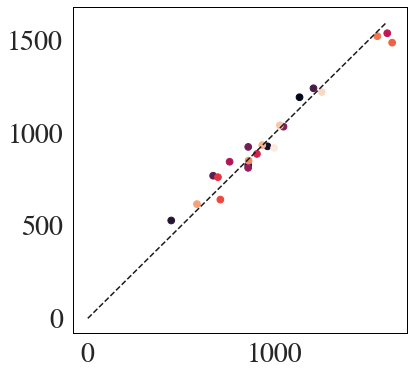

In [45]:
plt.rcParams["figure.figsize"]=(6, 6)
plt.scatter(y, yhat, s=45, c=range(len(y)))
plt.xlabel = "True AUCs"
plt.ylabel = "Predicted AUCs"
# plt.legend(label=subjs)
# for i, label in enumerate(subjs):
#     plt.text(y[i]+10, yhat[i]+10, label)
#     plt.lineplot()
#     plt.set_aspect('equal')
xpoints = ypoints = [0, 1600]
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1.5, scalex=False, scaley=False)
plt.show()

In [46]:
## Save the model!

import joblib

# Save the trained model to a file
joblib.dump(gbr, "gbr_model_auc.pkl")


['gbr_model_auc.pkl']

In [48]:
gbr_loaded = joblib.load("gbr_model_auc.pkl")

# Use the loaded model for predictions
predictions = gbr_loaded.predict(X.values)

In [49]:
predictions

array([1193.0411704 ,  928.25970562,  527.99155872,  826.37724144,
       1241.39820441,  769.58334025,  925.017433  , 1034.24965146,
        812.02815133,  844.93193823, 1538.48045333,  887.18202934,
        761.73526489,  640.73282853, 1487.70419193, 1522.38032664,
        851.11281743,  616.41476377,  934.68679132, 1041.20760207,
       1221.16900304,  919.76894136])

In [52]:
X

,Dose,Weight
0,16.09,81.646627
1,14.36,81.646627
2,12.86,81.646627
3,13.37,65.770894
4,13.50,56.245454
5,14.86,131.541787
6,11.15,55.338269
7,15.49,77.110703
8,12.65,81.646627
9,16.59,69.853225


## Use the AUC model for AD cohort

In [50]:
ad_main = pd.read_excel("/Users/darenma/Downloads/Sneha_DPA_forPBIF_with_other_scans_20241008.xlsx")

In [60]:
ad_main.loc[:, "mCi"] = ad_main.InjectionDose*0.027*1e-6

In [61]:
ad_main

,BHII_ID,ScanType,StudyDate,StudyTime,BirthDate,Age,Sex,Height,Weight,BMI,EthnicGroup,InjectionTime,InjectionDose,mCi
0,C08011,DPA,20231030,144919,19530927,70,M,1.613,67.131679,25.802321,NOT HISPANIC OR,145600,535390000,14.45553
1,C08017,DPA,20211014,122119,19360222,85,F,1.632,61.689000,23.161539,NOT HISPANIC OR,123600,530950000,14.33565
2,C08056,DPA,20230714,112533,19350327,88,M,1.630,60.700000,22.846174,UNKNOWN [7],114700,538350000,14.53545
3,C08094,DPA,20230703,112634,19611002,61,M,1.720,75.300000,25.452948,NOT HISPANIC OR,114800,497650000,13.43655
4,C08147,DPA,20240205,112156,19620319,61,M,1.715,89.100000,30.293500,NOT HISPANIC OR,114800,540570000,14.59539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,C09149,DPA,20240304,142438,19521103,71,M,1.790,81.646637,25.481925,NOT HISPANIC OR,144100,536870000,14.49549
119,C09150,DPA,20240401,142108,19490514,74,F,1.640,59.400000,22.085068,DECLINED [9],144200,524660000,14.16582
120,C09158,DPA,20240311,142251,19510113,73,M,1.745,77.800000,25.549872,DECLINED [9],143800,563880000,15.22476
121,C09161,DPA,20240223,112054,19450902,78,M,1.820,97.300000,29.374472,NOT HISPANIC OR,114600,497280000,13.42656


In [62]:
X_AD = ad_main[['mCi', 'Weight']]

In [63]:
predictions_AD = gbr_loaded.predict(X_AD.values)

In [64]:
predictions_AD

array([1107.85690536, 1563.76474424, 1563.76474424,  732.45049304,
        941.06431082,  592.96003585, 1041.20760207,  919.76894136,
        814.64174493,  747.51625042,  843.46553645,  769.58334025,
        721.5707819 ,  926.54414569,  925.017433  , 1248.29542466,
       1463.65510641,  769.58334025, 1538.48045333, 1538.48045333,
        826.37724144,  777.17223012,  941.06431082,  732.45049304,
        748.58133574,  941.06431082,  732.93185181,  941.06431082,
       1251.34892016,  919.76894136,  919.76894136,  928.25970562,
        592.96003585,  925.017433  , 1538.48045333,  741.81023711,
        715.91891265,  941.06431082,  922.28477068,  926.54414569,
       1274.08908442,  738.6590769 , 1013.69568977,  928.25970562,
       1041.20760207, 1414.7448438 ,  540.79616392,  913.82051913,
        580.15543065,  721.5707819 , 1003.05044582,  777.17223012,
       1538.48045333, 1438.37081551,  728.48993481, 1538.48045333,
       1438.37081551,  928.25970562,  738.6590769 , 1195.88471

In [65]:
ad_main.loc[:, "pred_AUC"] = predictions_AD

In [67]:
ad_main.to_csv("ad_cohort_main.csv")

In [68]:
pbif.to_csv("pbif_Mar2025.csv")

In [76]:
echo = scaled[['tts', 'pbif']]

In [82]:
auc_pred.values[0]

1107.8569053639317

In [83]:
for name in ad_main.BHII_ID:
    auc_pred = ad_main.loc[ad_main.BHII_ID==name, "pred_AUC"].values[0]
    print(auc_pred)
    echo.loc[:, name] = echo.loc[:, 'pbif'].values*auc_pred

1107.8569053639317
1563.7647442364193
1563.7647442364193
732.4504930374158
941.0643108187071
592.9600358504057
592.9600358504057
919.7689413628237
919.7689413628237
747.5162504192409
747.5162504192409
769.5833402486605
769.5833402486605
926.5441456865767
925.017432999976
1248.2954246580791
1248.2954246580791
769.5833402486605
1538.480453333512
1538.480453333512
826.3772414435424
777.1722301161881
777.1722301161881
732.4504930374158
748.5813357426647
941.0643108187071
732.9318518135391
732.9318518135391
1251.348920164525
919.7689413628237
919.7689413628237
928.25970561565
592.9600358504057
925.017432999976
925.017432999976
741.8102371070383
715.9189126472182
941.0643108187071
922.284770679789
922.284770679789
1274.0890844186815
738.6590769013751
1013.6956897689503
928.25970561565
1041.2076020653496
1414.7448437986566
540.79616392409
913.8205191297225
580.1554306473486
721.5707818958185
1003.0504458162055
777.1722301161881
1538.480453333512
1538.480453333512
728.4899348112593
1538.480453

/Users/darenma/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [84]:
echo

,tts,pbif,C08011,C08017,C08056,C08094,C08147,C08165,C08213,C08215,...,C09109,C09113,C09115,C09120,C09132,C09149,C09150,C09158,C09161,C09251
0,0.0,0.001071,1.186198,1.674345,1.674345,0.784245,1.007611,0.634891,0.984810,0.800376,...,0.634891,1.339837,0.978441,1.007611,0.839072,0.993901,1.647273,0.847900,0.634891,1.073980
1,15.0,0.003656,4.050665,5.717604,5.717604,2.678064,3.440820,2.168044,3.362958,2.733149,...,2.168044,4.575316,3.341208,3.440820,2.865288,3.394002,5.625157,2.895435,2.168044,3.667460
2,30.0,0.009943,11.015877,15.549157,15.549157,7.283057,9.357390,5.896046,9.145641,7.432862,...,5.896046,12.442678,9.086494,9.357390,7.792218,9.230068,15.297745,7.874204,5.896046,9.973744
3,45.0,0.030989,34.330846,48.458756,48.458756,22.697557,29.162191,18.374954,28.502279,23.164423,...,18.374954,38.777451,28.317946,29.162191,24.284350,28.765395,47.675233,24.539858,18.374954,31.083049
4,60.0,0.047646,52.785362,74.507717,74.507717,34.898609,44.838300,28.252394,43.823653,35.616437,...,28.252394,59.622236,43.540232,44.838300,37.338381,44.228207,73.303012,37.731237,28.252394,47.791715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.000626,0.693693,0.979163,0.979163,0.458629,0.589254,0.371286,0.575920,0.468063,...,0.371286,0.783541,0.572195,0.589254,0.490692,0.581237,0.963331,0.495855,0.371286,0.628067
357,5355.0,0.000622,0.689635,0.973435,0.973435,0.455946,0.585807,0.369114,0.572551,0.465325,...,0.369114,0.778957,0.568848,0.585807,0.487822,0.577836,0.957695,0.492954,0.369114,0.624393
358,5370.0,0.000619,0.685576,0.967706,0.967706,0.453263,0.582360,0.366942,0.569182,0.462586,...,0.366942,0.774374,0.565501,0.582360,0.484951,0.574436,0.952059,0.490053,0.366942,0.620719
359,5385.0,0.000615,0.681518,0.961978,0.961978,0.450580,0.578913,0.364770,0.565812,0.459848,...,0.364770,0.769790,0.562153,0.578913,0.482080,0.571036,0.946424,0.487152,0.364770,0.617044


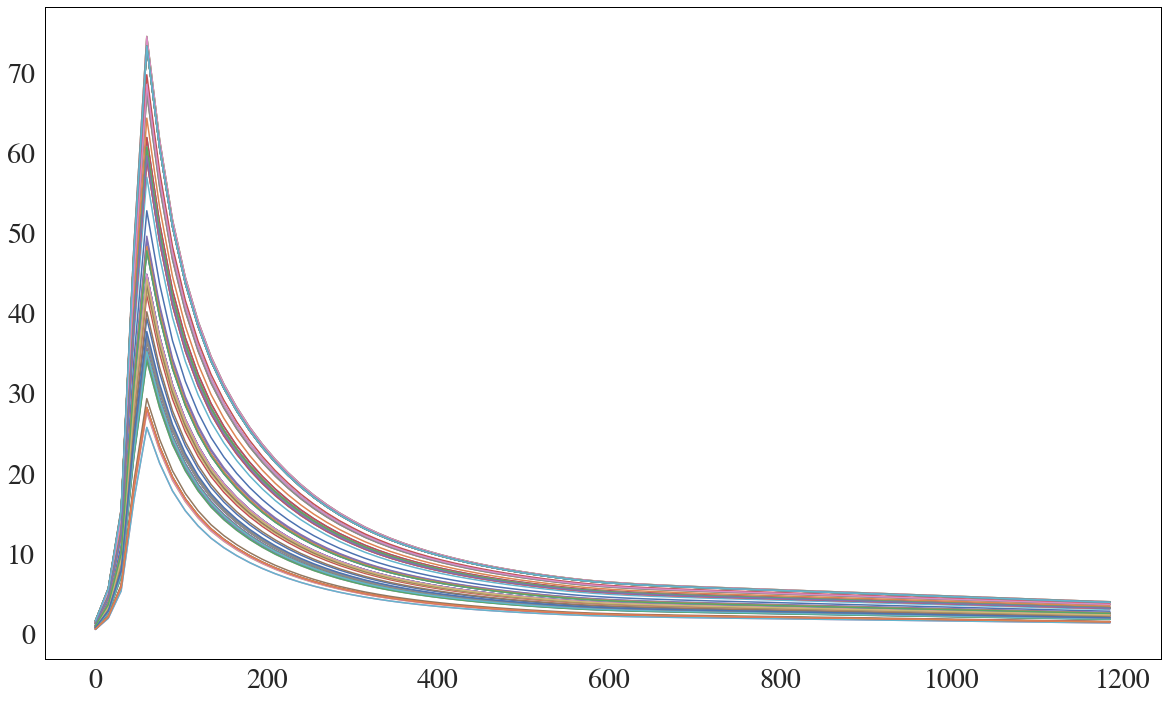

In [87]:
# AD Cohort pAIF
plt.rcParams["figure.figsize"] = (20,12)
for name in ad_main.BHII_ID:
    
    plt.plot(echo.iloc[:80]["tts"], echo.iloc[:80][name])
# plt.legend(name)
plt.show()

In [88]:
ad_main

,BHII_ID,ScanType,StudyDate,StudyTime,BirthDate,Age,Sex,Height,Weight,BMI,EthnicGroup,InjectionTime,InjectionDose,mCi,pred_AUC
0,C08011,DPA,20231030,144919,19530927,70,M,1.613,67.131679,25.802321,NOT HISPANIC OR,145600,535390000,14.45553,1107.856905
1,C08017,DPA,20211014,122119,19360222,85,F,1.632,61.689000,23.161539,NOT HISPANIC OR,123600,530950000,14.33565,1563.764744
2,C08056,DPA,20230714,112533,19350327,88,M,1.630,60.700000,22.846174,UNKNOWN [7],114700,538350000,14.53545,1563.764744
3,C08094,DPA,20230703,112634,19611002,61,M,1.720,75.300000,25.452948,NOT HISPANIC OR,114800,497650000,13.43655,732.450493
4,C08147,DPA,20240205,112156,19620319,61,M,1.715,89.100000,30.293500,NOT HISPANIC OR,114800,540570000,14.59539,941.064311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,C09149,DPA,20240304,142438,19521103,71,M,1.790,81.646637,25.481925,NOT HISPANIC OR,144100,536870000,14.49549,928.259706
119,C09150,DPA,20240401,142108,19490514,74,F,1.640,59.400000,22.085068,DECLINED [9],144200,524660000,14.16582,1538.480453
120,C09158,DPA,20240311,142251,19510113,73,M,1.745,77.800000,25.549872,DECLINED [9],143800,563880000,15.22476,791.901581
121,C09161,DPA,20240223,112054,19450902,78,M,1.820,97.300000,29.374472,NOT HISPANIC OR,114600,497280000,13.42656,592.960036


## Last Step: Save for Sneha

In [84]:
pred = yhat
print(pred)

dfs = scaled.copy()

for i, name in enumerate(subjs):
    print(i, name)
    dfs.loc[:, name] = scaled.loc[:, "pbif"] * pred[i]

[1193.0411704   928.25970562  527.99155872  826.37724144 1241.39820441
  769.58334025  925.017433   1034.24965146  812.02815133  844.93193823
 1538.48045333  887.18202934  761.73526489  640.73282853 1487.70419193
 1522.38032664  851.11281743  616.41476377  934.68679132 1041.20760207
 1221.16900304  919.76894136]
0 1001
1 1002
2 1003
3 1004
4 1005
5 1007
6 1009
7 1013
8 1015
9 1020
10 1022
11 1023
12 PP
13 MM
14 FR
15 KT
16 JD
17 PP-r
18 MM-r
19 FR-r
20 KT-r
21 JD-r


In [87]:
tnew

,tts,1001,1002,1003,1004,1005,1007,1009,1013,1015,...,PP,MM,FR,KT,JD,PP-r,MM-r,FR-r,KT-r,JD-r
0,0,0.000000,0.000000,6.811858e-04,0.000000,2.796953,0.000457,0.000000,0.000000,0.000000,...,0.000557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.875487,0.019977,0.000000
1,15,0.000000,0.000000,2.700293e-01,11.069919,15.677850,-0.000195,0.000000,0.000000,0.000000,...,0.000352,0.000000,10.483606,1.086649,0.036519,0.000000,0.000000,15.268822,4.877288,0.849442
2,30,0.000000,0.000000,9.247292e+00,22.139838,27.244724,0.000681,19.396233,0.000000,0.000000,...,0.641315,0.000000,20.967212,18.767985,0.735647,0.019990,1.219983,29.042690,17.505821,19.287583
3,45,31.171421,34.368359,2.774306e+01,31.461949,35.356571,22.486587,46.319695,18.296082,14.990983,...,23.304393,6.443136,31.450817,33.130612,21.341486,10.748789,22.739043,38.332426,26.302699,43.543287
4,60,59.208352,48.984209,4.145142e+01,33.394315,39.295153,42.942086,48.572047,55.306028,45.315262,...,33.970964,36.050840,41.934423,46.059489,48.083775,26.670829,35.313365,40.211147,33.128422,47.915434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340,0.982700,0.485814,4.027397e-08,0.436141,0.679269,0.430912,0.424261,0.635392,0.520611,...,0.302424,0.303025,1.004503,1.972078,0.402701,0.215772,0.549020,0.990639,1.748343,0.523217
357,5355,0.978329,0.480183,3.020550e-08,0.432706,0.676183,0.427630,0.421490,0.630598,0.516684,...,0.299997,0.300557,0.997856,1.965768,0.399494,0.213612,0.545748,0.987714,1.745459,0.519455
358,5370,0.973957,0.474552,2.013704e-08,0.429271,0.673097,0.424348,0.418719,0.625804,0.512756,...,0.297571,0.298088,0.991209,1.959457,0.396286,0.211451,0.542476,0.984789,1.742574,0.515692
359,5385,0.969585,0.468921,1.006858e-08,0.425836,0.670011,0.421066,0.415949,0.621011,0.508828,...,0.295144,0.295620,0.984562,1.953147,0.393079,0.209291,0.539204,0.981864,1.739689,0.511930


In [85]:
dfs

,tts,1001,1002,1003,1004,1005,1007,1009,1013,1015,...,MM,FR,KT,JD,PP-r,MM-r,FR-r,KT-r,JD-r,pbif
0,0.0,1.277406,0.993901,0.565328,0.884814,1.329183,0.824004,0.990429,1.107386,0.869450,...,0.686042,1.592906,1.630034,0.911299,0.660004,1.000782,1.114836,1.307523,0.984810,0.001071
1,15.0,4.362125,3.394002,1.930499,3.021489,4.538933,2.813833,3.382148,3.781534,2.969024,...,2.342716,5.439503,5.566290,3.111930,2.253802,3.417502,3.806975,4.464969,3.362958,0.003656
2,30.0,11.862900,9.230068,5.250037,8.217009,12.343734,7.652284,9.197829,10.283970,8.074330,...,6.371070,14.792855,15.137654,8.462965,6.129266,9.293976,10.353156,12.142586,9.145641,0.009943
3,45.0,36.970581,28.765395,16.361677,25.608208,38.469094,23.848249,28.664922,32.049866,25.163551,...,19.855362,46.101752,47.176314,26.374727,19.101781,28.964561,32.265483,37.842220,28.502279,0.030989
4,60.0,56.844083,44.228207,25.156882,39.373877,59.148121,36.667854,44.073725,49.278244,38.690195,...,30.528595,70.883707,72.535899,40.552438,29.369927,44.534434,49.609765,58.184273,43.823653,0.047646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.747032,0.581237,0.330606,0.517442,0.777311,0.481880,0.579206,0.647603,0.508457,...,0.401200,0.931537,0.953250,0.532931,0.385973,0.585261,0.651960,0.764644,0.575920,0.000626
357,5355.0,0.742661,0.577836,0.328672,0.514415,0.772763,0.479061,0.575818,0.643814,0.505483,...,0.398852,0.926087,0.947673,0.529813,0.383715,0.581837,0.648146,0.760171,0.572551,0.000622
358,5370.0,0.738291,0.574436,0.326738,0.511388,0.768216,0.476242,0.572430,0.640026,0.502508,...,0.396505,0.920638,0.942096,0.526695,0.381457,0.578413,0.644332,0.755697,0.569182,0.000619
359,5385.0,0.733921,0.571036,0.324803,0.508361,0.763668,0.473423,0.569041,0.636237,0.499534,...,0.394158,0.915188,0.936520,0.523577,0.379199,0.574989,0.640517,0.751224,0.565812,0.000615


In [530]:
zl = ['1001',
      '1002',
      '1003',
      '1004',
      '1005',
      "1007",
      '1009',
      '10013',
      '10015',
      '10020',
      '10022',
      '10023']

In [583]:
for x in zl:
    if len(x)>4:
        xname = str(int(x[0]+x[2:]))
    else:
        xname = str(int(x))
    pathn = PATH_PD + x + ".crv"
    dfn = dfs[["tts", xname]]
    
    dfn = dfn.set_index("tts")
#     dfn = pd.read_csv(pathn, sep="\t")
#     dfn.loc[:,'value[kBq/cc]'] = mainf[xname]
#     dfn.to_csv(pathn, sep="\t", index=False)

In [579]:
dfs

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,0.000000,0.000000,0.000000e+00,0.000000,3.171345,0.000000,0.000000,0.000000,20.073348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000608,0.001262
1,15.0,0.000000,0.000000,0.000000e+00,3.856522,16.913842,0.000000,0.000000,0.000000,30.110022,0.000000,0.000000,8.923986,0.000000,0.224943,0.000000,0.000384,0.003212
2,30.0,0.000000,0.000000,1.697424e+01,7.713044,28.542109,22.190084,0.000000,0.000000,30.110022,0.000000,7.936840,17.847972,1.083216,0.449885,0.000000,1.091847,0.008029
3,45.0,30.523214,46.017099,5.280875e+01,11.569566,36.999030,53.723361,18.341100,9.029421,30.110022,42.066447,38.802329,26.771957,22.747536,0.674828,6.411711,25.112492,0.029091
4,60.0,58.092569,66.318760,7.732710e+01,15.426087,41.227491,57.227059,56.042249,27.088262,32.977643,56.789703,52.030396,35.695943,51.994368,0.899771,38.470269,37.122814,0.046840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.984620,0.030077,7.585581e-08,0.019696,1.057115,0.025953,1.018950,0.601961,1.433811,0.716775,0.881871,0.879210,0.036411,1.819648,0.036224,0.036395,0.000568
357,5355.0,0.984620,0.022557,5.689191e-08,0.014772,1.057115,0.019465,1.018950,0.601961,1.433811,0.712858,0.881871,0.871884,0.027308,1.814621,0.027168,0.027296,0.000563
358,5370.0,0.984620,0.015038,3.792802e-08,0.009848,1.057115,0.012977,1.018950,0.601961,1.433811,0.708941,0.881871,0.864557,0.018205,1.809595,0.018112,0.018197,0.000559
359,5385.0,0.984620,0.007519,1.896412e-08,0.004924,1.057115,0.006488,1.018950,0.601961,1.433811,0.705024,0.881871,0.857230,0.009103,1.804568,0.009056,0.009099,0.000555


In [609]:
dfs

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,1.354106,1.488897,1.037986,0.927137,1.617935,1.221391,1.322218,0.643590,1.429802,1.426614,0.979591,1.816819,1.176584,1.733747,0.971882,0.966823,0.001262
1,15.0,3.445732,3.788728,2.641316,2.359244,4.117084,3.108018,3.364586,1.637713,3.638351,3.630240,2.492720,4.623177,2.993999,4.411785,2.473104,2.460231,0.003212
2,30.0,8.613426,9.470825,6.602596,5.897490,10.291630,7.769230,8.410583,4.093852,9.094922,9.074647,6.231146,11.556728,7.484211,11.028305,6.182111,6.149932,0.008029
3,45.0,31.207418,34.313874,23.921955,21.367277,37.287742,28.148801,30.472495,14.832490,32.951934,32.878474,22.576147,41.871335,27.116147,39.956801,22.398490,22.281901,0.029091
4,60.0,50.246858,55.248541,38.516581,34.403311,60.036746,45.322198,49.063563,23.881695,53.055690,52.937414,36.349705,67.416760,43.659528,64.334180,36.063661,35.875942,0.046840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.608838,0.669443,0.466703,0.416863,0.727461,0.549166,0.594500,0.289373,0.642872,0.641439,0.440447,0.816885,0.529020,0.779533,0.436981,0.434706,0.000568
357,5355.0,0.604453,0.664621,0.463341,0.413860,0.722222,0.545211,0.590218,0.287289,0.638242,0.636819,0.437275,0.811001,0.525209,0.773918,0.433834,0.431575,0.000563
358,5370.0,0.600067,0.659799,0.459980,0.410858,0.716982,0.541255,0.585936,0.285204,0.633611,0.632199,0.434102,0.805117,0.521399,0.768304,0.430686,0.428444,0.000559
359,5385.0,0.595682,0.654977,0.456618,0.407855,0.711742,0.537300,0.581654,0.283120,0.628981,0.627579,0.430930,0.799233,0.517588,0.762689,0.427539,0.425313,0.000555


In [100]:
list(echo.columns[2:])

['C08011',
 'C08017',
 'C08056',
 'C08094',
 'C08147',
 'C08165',
 'C08213',
 'C08215',
 'C08218',
 'C08222',
 'C08261',
 'C08264',
 'C08269',
 'C08270',
 'C08278',
 'C08282',
 'C08284',
 'C08295',
 'C08412',
 'C08420',
 'C08429',
 'C08479',
 'C08511',
 'C08518',
 'C08543',
 'C08550',
 'C08566',
 'C08569',
 'C08591',
 'C08604',
 'C08612',
 'C08617',
 'C08622',
 'C08635',
 'C08636',
 'C08637',
 'C08644',
 'C08665',
 'C08678',
 'C08687',
 'C08693',
 'C08694',
 'C08697',
 'C08702',
 'C08709',
 'C08711',
 'C08712',
 'C08720',
 'C08722',
 'C08723',
 'C08724',
 'C08728',
 'C08735',
 'C08737',
 'C08738',
 'C08740',
 'C08742',
 'C08744',
 'C08745',
 'C08749',
 'C08751',
 'C08752',
 'C08758',
 'C08759',
 'C08761',
 'C08768',
 'C08770',
 'C08771',
 'C08772',
 'C08774',
 'C08787',
 'C08788',
 'C08793',
 'C08795',
 'C08804',
 'C08806',
 'C08809',
 'C08810',
 'C08817',
 'C08820',
 'C08822',
 'C08826',
 'C08829',
 'C08831',
 'C08834',
 'C08837',
 'C08839',
 'C08842',
 'C08857',
 'C08858',
 'C08888',

In [101]:
PATH_ = '/Users/darenma/Downloads/pAIF_AD/'

for xname in list(echo.columns[2:]):
    pathn = PATH_ + xname + ".crv"
    dfn = echo[["tts", xname]]
    dfn = dfn.set_index("tts")
    dfn.columns = ["value[kBq/cc]"]
    dfn.to_csv(pathn, sep="\t", index=True)

In [89]:
PATH_ = '/Users/darenma/Downloads/PBIFs_replace_and_compare/predicted_AIF/'

for xname in subjs:
    pathn = PATH_ + xname + ".crv"
    dfn = dfs[["tts", xname]]
    dfn = dfn.set_index("tts")
    dfn.columns = ["value[kBq/cc]"]
    dfn.to_csv(pathn, sep="\t", index=True)

In [96]:
PATH_ = '/Users/darenma/Downloads/PBIFs_replace_and_compare/interpolated_AIF/'

for xname in subjs:
    pathn = PATH_ + xname + ".crv"
    dfn = tnew[["tts", xname]]
    dfn = dfn.set_index("tts")
    dfn.columns = ["value[kBq/cc]"]
    dfn.to_csv(pathn, sep="\t", index=True)

In [90]:
pd.read_csv('/Users/darenma/Downloads/PBIFs_replace_and_compare/predicted_AIF/PP.crv', sep="\t")

,tts,value[kBq/cc]
0,0.0,0.815601
1,15.0,2.785138
2,30.0,7.574247
3,45.0,23.605049
4,60.0,36.293922
...,...,...
356,5340.0,0.476966
357,5355.0,0.474176
358,5370.0,0.471385
359,5385.0,0.468595


In [97]:
pd.read_csv('/Users/darenma/Downloads/PBIFs_replace_and_compare/interpolated_AIF/PP.crv', sep="\t")

,tts,value[kBq/cc]
0,0,0.000557
1,15,0.000352
2,30,0.641315
3,45,23.304393
4,60,33.970964
...,...,...
356,5340,0.302424
357,5355,0.299997
358,5370,0.297571
359,5385,0.295144


In [91]:
df1007 = "/Users/darenma/Downloads/MetCorr_AIF_MS_PD/MetCorr_AIF_PD/1007_DPA_MetCorrWB_model.crv"

In [94]:
pd.read_csv(df1007, sep="\t")

,Parent_input_curve_model_time[seconds],value[kBq/cc]
0,0,0.000166
1,15,0.000401
2,30,0.000237
3,45,0.000457
4,60,-0.000195
5,75,0.000681
6,90,22.486587
7,105,42.942086
8,120,31.378096
9,135,24.305034


In [ ]:
# Blood Volume. 
# Add Blood Volume

# Quickly check: AUC model - Train on PD, predict on 10 Healthy.
# See if it works for ML-2 as well.